In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-data/gld_price_data.csv


In [2]:
data = pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


## Data exploration and preprocessing

In [3]:
data.shape

(2290, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
data['Date']=pd.to_datetime(data['Date'])

In [7]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Data visualization

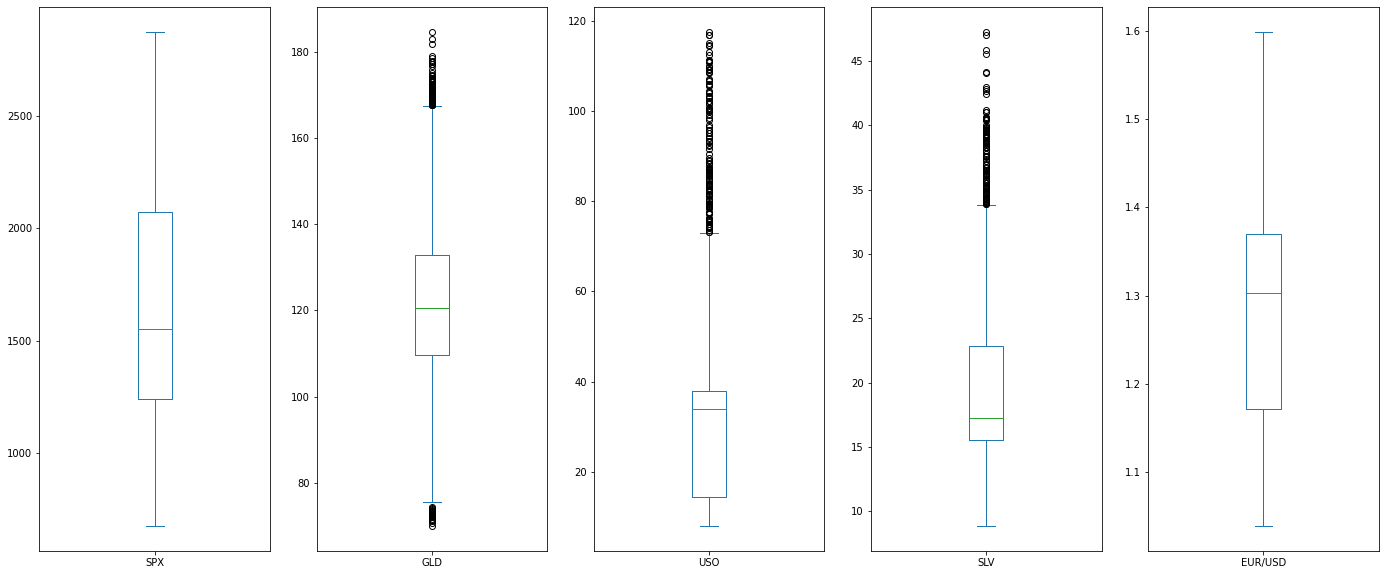

In [8]:
data.plot(kind="box", subplots=True, layout=(1,5),
          figsize=(24,10),sharex=False, sharey=False);

Text(0.5, 0, 'YEARS')

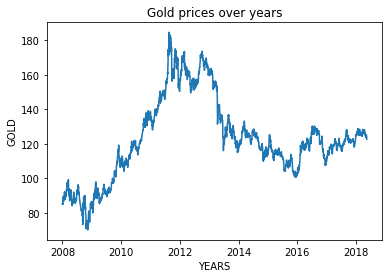

In [9]:
plt.plot(data['Date'], data['GLD'])
#plt.xticks(rotation='vertical')
plt.title('Gold prices over years')
plt.ylabel("GOLD")
plt.xlabel("YEARS")

<AxesSubplot:>

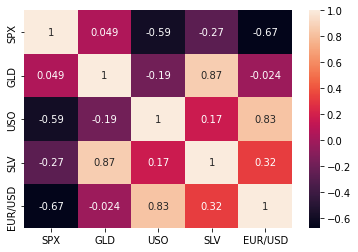

In [10]:
sns.heatmap(data.corr(),annot=True)

In [11]:
px.scatter_matrix(data.sample(n=100), dimensions=["SPX", "GLD",
                                  "USO", "SLV","EUR/USD"])

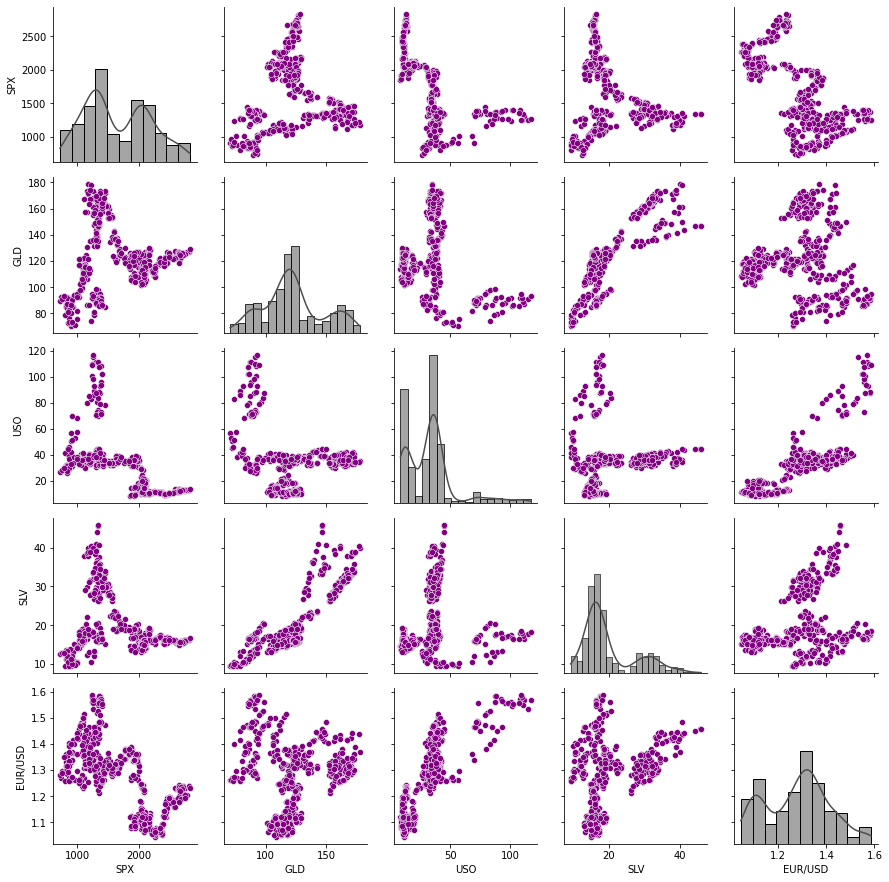

In [12]:
g=sns.PairGrid(data.sample(n=500))
#g.map_upper(sns.histplot)
#g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True,color=".3")
g.map_offdiag(sns.scatterplot,color='purple')

## Feature Selection

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [14]:
print(data.corr()['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [15]:
X = data.drop(['GLD', 'Date'], axis=1)
y = data['GLD']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,'\n', X_test.shape,'\n',y_train.shape,'\n', y_test.shape)

(1832, 4) 
 (458, 4) 
 (1832,) 
 (458,)


## Model fit & predict

In [17]:
lrg = LinearRegression()
knr = KNeighborsRegressor(n_neighbors=3)
rfr = RandomForestRegressor()
svr = SVR()

fitting

In [18]:
lrg.fit(X_train, y_train)
knr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
svr.fit(X_train, y_train)

SVR()

prediction on training

In [19]:
yt_lrg = lrg.predict(X_train)
yt_knr = knr.predict(X_train)
yt_rfr = rfr.predict(X_train)
yt_svr = svr.predict(X_train)

training accuracy

In [20]:
lrg_acc = r2_score(yt_lrg,y_train)
knr_acc = r2_score(yt_knr,y_train)
rfr_acc = r2_score(yt_rfr,y_train)
svr_acc = r2_score(yt_svr,y_train)
print(' LinearRegrission accuracy =',round(lrg_acc,3),'\n',
      'KNeighborsRegressor accuracy =',round(knr_acc,3),'\n',
      'RandomForestRegressor accuracy =',round(rfr_acc,3),'\n',
      'SupportVectorRegressor accuracy =',round(svr_acc,3))


 LinearRegrission accuracy = 0.86 
 KNeighborsRegressor accuracy = 0.976 
 RandomForestRegressor accuracy = 0.999 
 SupportVectorRegressor accuracy = -45.673


prediction on test

In [21]:
ytst_lrg = lrg.predict(X_test)
ytst_knr = knr.predict(X_test)
ytst_rfr = rfr.predict(X_test)
ytst_svr = svr.predict(X_test)

test accuracy

In [22]:
lrg_acc2 = r2_score(ytst_lrg,y_test)
knr_acc2 = r2_score(ytst_knr,y_test)
rfr_acc2 = r2_score(ytst_rfr,y_test)
svr_acc2 = r2_score(ytst_svr,y_test)
print(' LinearRegrission accuracy =',round(lrg_acc2,3),'\n',
      'KNeighborsRegressor accuracy =',round(knr_acc2,3),'\n',
      'RandomForestRegressor accuracy =',round(rfr_acc2,3),'\n',
      'SupportVectorRegressor accuracy =',round(svr_acc2,3))

 LinearRegrission accuracy = 0.876 
 KNeighborsRegressor accuracy = 0.947 
 RandomForestRegressor accuracy = 0.99 
 SupportVectorRegressor accuracy = -40.699


**Random Forest is the best model on trainig and test accuracy**

In [23]:
#values prediction using random forest regressor
gold_predicted = rfr.predict([[1447.160034,78.470001,15.180,1.471692]])
print(gold_predicted)
#1447.160034	84.860001	78.470001	15.180	1.471692

[85.02650032]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

